# HW6 Data exploration and linear model

In [1]:
import pandas

In [2]:
# load data
tax = pandas.read_csv("incomeTaxData.csv")
tax

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order
0,2011,Hamilton,"500,000 and over",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,13
1,2003,Dutchess,"100,000 - 199,999",NaN,12738.0,1668991.0,261775.0,16628.0,1390589.0,91652.0,87689.0,19,10
2,2001,Ontario,Total,NaN,44898.0,1829734.0,449962.0,25393.0,1354378.0,77454.0,72764.0,38,12
3,2012,New York City - Richmond,"30,000 - 39,999",NaN,16086.0,559918.0,192402.0,10519.0,356997.0,17286.0,12238.0,5,5
4,2007,Clinton,"50,000 - 59,999",NaN,2197.0,120482.0,29429.0,1649.0,89404.0,4738.0,4220.0,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,2013,Residence Unknown ++,"100,000 - 199,999",NaN,527.0,74543.0,10177.0,282.0,64083.0,4095.0,3720.0,66,10
12585,2013,Residence Unknown ++,"200,000 - 249,999",NaN,127.0,28013.0,3219.0,93.0,24702.0,1643.0,1469.0,66,11
12586,2013,Residence Unknown ++,"250,000 - 499,999",NaN,223.0,79218.0,5876.0,174.0,73168.0,4972.0,4492.0,66,12
12587,2013,Residence Unknown ++,"500,000 and over",NaN,326.0,872846.0,14092.0,290.0,858465.0,71780.0,63360.0,66,13


You can see just from the first line of the dataset that the there are some rows with no **returns** associated with it. Let's delete those from the dataset.

Also note that all of the data is in **thousands of dollars**.

In [3]:
# clean data
tax = tax.dropna(subset=['ReturnCount'])
tax = tax.sort_values(by=['Year'])

# create new columns
tax['avg_tax'] = tax['TotalTaxLiability']/tax['ReturnCount']

In [4]:
tax

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax
1832,1999,New York City - Richmond,"100,000 - 199,999",NaN,13268.0,1702578.0,240372.0,16059.0,1446147.0,93944.0,89087.0,5,10,6.714426
8076,1999,Putnam,"60,000 - 74,999",NaN,3771.0,253537.0,58244.0,3944.0,191349.0,10522.0,9971.0,43,8,2.644126
8082,1999,Warren,"50,000 - 59,999",NaN,1624.0,89033.0,20718.0,1568.0,66747.0,3423.0,3397.0,58,7,2.091749
8102,1999,Lewis,"200,000 and over",NaN,28.0,8149.0,461.0,36.0,7652.0,524.0,466.0,29,11,16.642857
8107,1999,Allegany,"20,000 - 29,999",NaN,2559.0,63424.0,26979.0,2164.0,34281.0,1494.0,1200.0,8,4,0.468933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,2013,Fulton,"60,000 - 74,999",NaN,1520.0,102142.0,21758.0,1154.0,79230.0,4268.0,3960.0,23,8,2.605263
11995,2013,Fulton,"75,000 - 99,999",NaN,1519.0,130737.0,23742.0,1318.0,105678.0,5918.0,5560.0,23,9,3.660303
11996,2013,Fulton,"100,000 - 199,999",NaN,1441.0,186458.0,25932.0,1483.0,159044.0,9823.0,9472.0,23,10,6.573213
11985,2013,Franklin,"500,000 and over",NaN,30.0,41689.0,820.0,40.0,40829.0,3237.0,3059.0,22,13,101.966667


## a)


Plot the number of returns in Tompkins County from each income class bracket over time on a single graph.（Ignore the rows with the class of 'Total'. Should span 1999-2013. Some of the county names may have leading/trailing whitespaces.）

<AxesSubplot:xlabel='Year', ylabel='ReturnCount'>

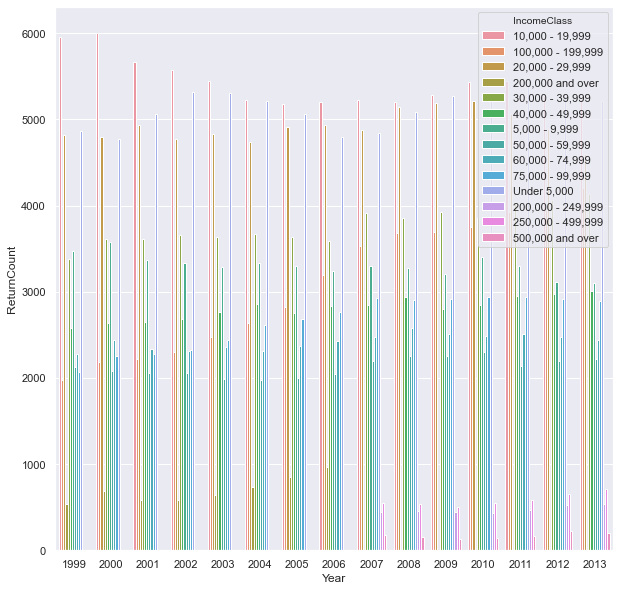

In [125]:
###Enter your codes here
import matplotlib.pyplot as plt
import seaborn as sns

ttax=tax[tax['County'].str.contains("Tompkins")].groupby(['Year', 'IncomeClass']).sum()
ttax.reset_index(inplace=True)
ttax.drop(ttax[ttax['IncomeClass']=='Total'].index, inplace=True)

sns.set(rc = {'figure.figsize':(10, 10)})
sns.barplot(x = 'Year', y = 'ReturnCount', hue = 'IncomeClass', data = ttax)

Plot the average income tax per return in Tompkins County (disregarding income tax).（You could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The sum might differ from the number in 'total'; either answer is ok. Messy data!)

In [54]:
###Enter your codes here
tompkins=tax[tax['County'].str.contains("Tompkins")]

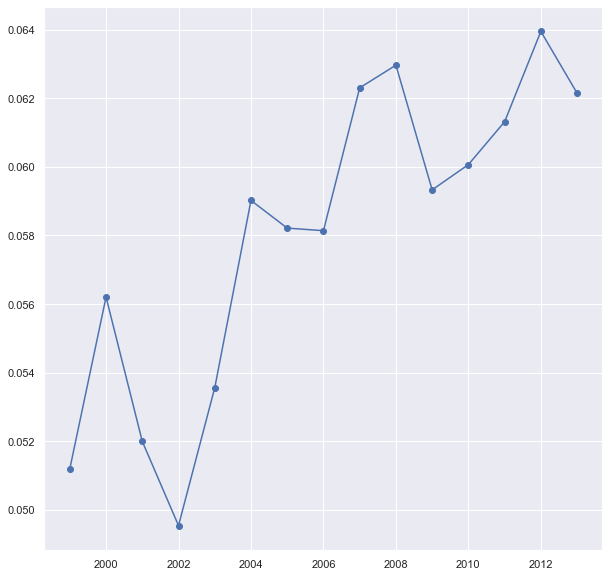

In [65]:
tompkins_total = tompkins[tompkins['IncomeClass'] == 'Total']
plt.plot(tompkins_total['Year'], (tompkins_total['avg_tax']*1000)/tompkins_total['ReturnCount'], '-o')

Question: What kind of plot did you choose to make? Why?

Answer: I chose a barplot since the level of the bars can easily demonstrate the difference in the different income classes. For the second plot, I chose a scatter plot with lines because it shows the fluctuations. 

## b)

Continuing to look only at Tompkins County, fit a linear model that predicts **avg_tax** using the year number. Do this with **least squares**.

In [131]:
###Enter your codes here
total_tompkins=tax[tax['County'].str.contains("Tompkins")]
total_tompkins=total_tompkins[total_tompkins['IncomeClass'] == 'Total']

Transform the input to include an offset term in the model

In [132]:
###Enter your codes here0
import numpy as np
from scipy.linalg import qr, solve

# Define data
x = total_tompkins['Year'].to_numpy()
n = len(x)
y = total_tompkins['avg_tax'].to_numpy()
# y = np.append(y, 1)

# x as [x,1]
X = np.column_stack([x, np.ones(n)])


# Reg
Q,R = qr(X, mode='economic')
wb = solve(R, Q.T @ y)
wb

array([ 5.27299857e-02, -1.03648049e+02])

## c)

Now we will change the feature space. Fit a model using the **year** and the **avg_tax** from the previous year (and offset).

In [133]:
###Enter your codes here
# Define data
x1 = total_tompkins['Year'].to_numpy()
x2 = total_tompkins['avg_tax'][:-1].to_numpy()
x2 = np.insert(x2, 0, 0)
n = len(x1)
y = total_tompkins['avg_tax'].to_numpy()
# y = np.append(y, 1)

# x as [x,1]
X = np.column_stack([x1, x2, np.ones(n)])


# Reg
Q,R = qr(X, mode='economic')
wc = solve(R, Q.T @ y)
wc

array([ 5.05890753e-02,  2.17512032e-02, -9.93962089e+01])

Question: Interpret the coefficients of this. What do they mean?

Answer: This means there is a small but positive correlation to the year and avg tax, small but negative correlation to the previous year's avg tax and avg tax for that year, and with offset b ~ -99

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

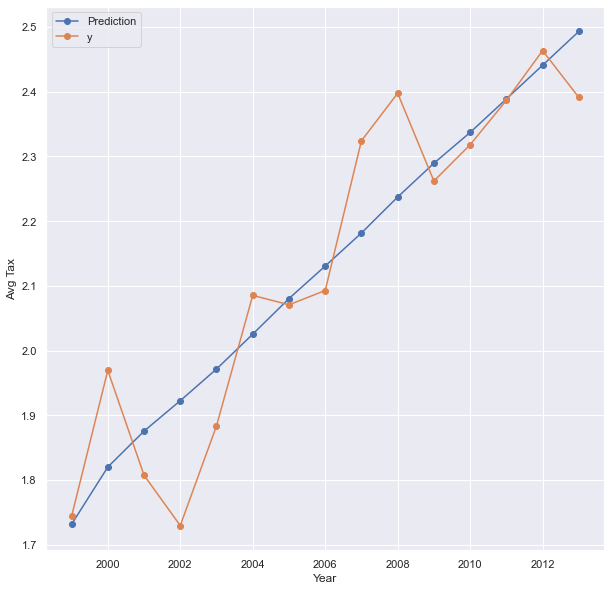

In [147]:
###Enter your codes here
plt.plot(x1,wc[0]*x1 + wc[1]*x2 + wc[2], '-o', label = 'Prediction')
plt.plot(x1, y, '-o', label = 'y')
plt.xlabel('Year')
plt.ylabel('Avg Tax')
plt.legend()
plt.show()

Discussion: I do not think that the model is a good fit to the data. While overall it does follow an increasing trend, it does not capture the fluctuations between years. 

## d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

State the feature space for your new model and why you think those features predict the data well. Fit this model and interpret the coefficients.

In [145]:
###Enter your codes here
# Define data
x1 = total_tompkins['Year'].to_numpy()
x2 = total_tompkins['avg_tax'][:-1].to_numpy()
x2 = np.insert(x2, 0, 0)
n = len(x1)

x3 = total_tompkins['TotalTaxableIncome'][:-1].to_numpy()
x3 = np.insert(x3, 0, 0)

x4 = total_tompkins['TotalIncome'][:-1].to_numpy()
x4 = np.insert(x4, 0, 0)

y = total_tompkins['avg_tax'].to_numpy()
# y = np.append(y, 1)

# x as [x,1]
X = np.column_stack([x1, x2, x3, x4, np.ones(n)])


# Reg
Q,R = qr(X, mode='economic')
wd = solve(R, Q.T @ y)
wd

array([ 4.61895803e-02, -7.26673025e-01, -8.20617920e-07,  1.54631318e-06,
       -9.06100201e+01])

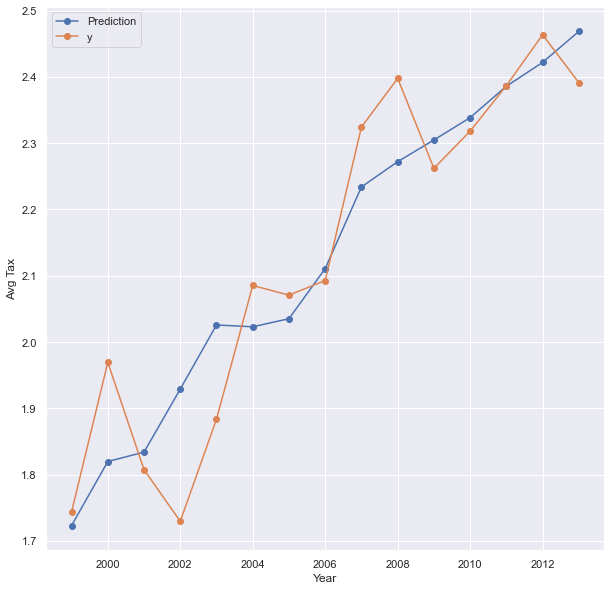

In [148]:
plt.plot(x1,wd[0]*x1 + wd[1]*x2 + wd[2]*x3 + wd[3]*x4 + wd[4], '-o', label = 'Prediction')
plt.plot(x1, y, '-o', label = 'y')
plt.xlabel('Year')
plt.ylabel('Avg Tax')
plt.legend()
plt.show()

Answer to the question: The feature space is x in R^5, where x[1] is the year, x[2] is the avg tax in previous year, x[3] is total taxable income in previous year, and x[4] is total income. I thought these would predict the data better because after inspection of the dataframe, it seemed that the new features had a positive corrleation with the avg tax. This model is better than wc as it does capture some of the fluctuations. 

## e)

Compare the coefficients from part c and d. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

Answer: Yes. In wc, the coefficient was positive whereas wd has a negative coefficient. Since wd has a better fit, I interpret the negative coefficient to be a more correct coefficient. 

## f)

(see homework handout for details) Now we want to see how this model performs in **other counties**. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

In [169]:
wc[:1]

array([0.05058908])

In [170]:
fulton

,Year,IncomeClass,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax
10,1999,Total,22949.0,704502.0,210740.0,12437.0,481326.0,25970.0,23902.0,23,12,1.041527
22,2000,Total,23462.0,750509.0,216209.0,12699.0,521608.0,28452.0,25956.0,23,12,1.106300
34,2001,Total,22981.0,736352.0,214576.0,12431.0,509337.0,27692.0,25125.0,23,12,1.093294
46,2002,Total,22963.0,751200.0,219767.0,12381.0,519051.0,28369.0,24901.0,23,12,1.084397
58,2003,Total,22917.0,776835.0,222732.0,12386.0,541717.0,30578.0,26350.0,23,12,1.149801
70,2004,Total,23186.0,785436.0,227463.0,12455.0,545518.0,30399.0,26431.0,23,12,1.139955
82,2005,Total,23406.0,815248.0,232887.0,12487.0,569832.0,31984.0,27721.0,23,12,1.184354
94,2006,Total,23840.0,870378.0,241174.0,12480.0,616735.0,34619.0,27963.0,23,12,1.172945
108,2007,Total,24606.0,931808.0,249261.0,12654.0,669893.0,38060.0,31089.0,23,14,1.263472
122,2008,Total,23378.0,853912.0,235248.0,11849.0,613627.0,34593.0,27829.0,23,14,1.190393


In [171]:
wc

array([ 5.05890753e-02,  2.17512032e-02, -9.93962089e+01])

In [180]:
tax['County'] = tax['County'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [182]:
###Enter your codes here

def error_wc(w, y, df):
    return ((y - (w[0]*df['Year'] + w[1]*df['avg_tax'] + w[2]))**2)/len(df)


In [186]:
tax['County'].value_counts()

New York City - Richmond           194
Yates                              194
Onondaga                           194
Cortland                           194
Columbia                           194
                                  ... 
Orleans                            190
Schuyler                           186
Hamilton                           181
Grand Total, Full-Year Resident    180
NYS Unclassified +                 158
Name: County, Length: 65, dtype: int64

In [185]:
tax.groupby(['County', 'IncomeClass']).sum()

Year  ReturnCount  TotalIncome  TotalDeductions  \
County IncomeClass                                                           
Albany 10,000 - 19,999    30090     292412.0    4333582.0        2619844.0   
       100,000 - 199,999  30090     179557.0   23686769.0        3448252.0   
       20,000 - 29,999    30090     255129.0    6346042.0        2480360.0   
       200,000 - 249,999  14070       9542.0    2113523.0         227461.0   
       200,000 and over   16020      20905.0   10351976.0         596208.0   
...                         ...          ...          ...              ...   
Yates  500,000 and over   14070        124.0     149387.0           2583.0   
       60,000 - 74,999    30090       9538.0     637940.0         141166.0   
       75,000 - 99,999    30090       8253.0     707486.0         131412.0   
       Total              30090     154843.0    5283292.0        1541424.0   
       Under 5,000        30090      26803.0      16996.0          49021.0   

                          TotalExemptions  TotalTaxableIncome  \
County IncomeClass                                              
Albany 10,000 - 19,999            96139.0           1617448.0   
       100,000 - 199,999         202973.0          20035565.0   
       20,000 - 29,999           123238.0           3742373.0   
       200,000 - 249,999          11158.0           1874906.0   
       200,000 and over           26362.0           9729411.0   
...                                   ...                 ...   
Yates  500,000 and over             102.0            146705.0   
       60,000 - 74,999            10860.0            485917.0   
       75,000 - 99,999             9937.0            566134.0   
       Total                      88977.0           3687535.0   
       Under 5,000                    1.0              2624.0   

                          TotalTaxBeforeCredits  TotalTaxLiability  \
County IncomeClass                                                   
Albany 10,000 - 19,999                  65981.0           -25799.0   
       100,000 - 199,999              1301395.0          1263753.0   
       20,000 - 29,999                 169229.0           102596.0   
       200,000 - 249,999               127288.0           121817.0   
       200,000 and over                694324.0           646631.0   
...                                         ...                ...   
Yates  500,000 and over                 11939.0            11716.0   
       60,000 - 74,999                  26224.0            23034.0   
       75,000 - 99,999                  32381.0            28947.0   
       Total                           207160.0           164233.0   
       Under 5,000                        106.0            -2398.0   

                          Place of Residence Sort Order  \
County IncomeClass                                        
Albany 10,000 - 19,999                              105   
       100,000 - 199,999                            105   
       20,000 - 29,999                              105   
       200,000 - 249,999                             49   
       200,000 and over                              56   
...                                                 ...   
Yates  500,000 and over                             441   
       60,000 - 74,999                              945   
       75,000 - 99,999                              945   
       Total                                        945   
       Under 5,000                                  945   

                          Income Class Sort Order     avg_tax  
County IncomeClass                                             
Albany 10,000 - 19,999                         45   -1.369847  
       100,000 - 199,999                      150  105.868093  
       20,000 - 29,999                         60    5.950903  
       200,000 - 249,999                       77   89.289893  
       200,000 and over                        88  246.662644  
...                                    

Are there major outliers?

Answer:

## g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [ ]:
###Enter your codes here

Again, are there major outliers? How do the coefficients compare across counties?

Answer:

## h)

If you wanted to predict the income tax in each county in future years, do you think the county-specific models or the Tompkins model would perform better? Why? What concerns might you have about each model?

Answer:

## i)

What other information would you want to use to make your model even better?

Answer: Economic growth, knowing state tax rates, etc.

# 2

I think overall the course is pretty useful, and I like that hw tackles conceptual and coding problems. 